<a href="https://colab.research.google.com/github/Favourj-bit/Random_projects/blob/main/__DSN_bootcamp_qualification_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn


# Set all options
plt.style.use('seaborn-notebook')
plt.rcParams["figure.figsize"] = (15, 3)
pd.options.display.float_format = '{:20,.4f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(context="paper", font="monospace")

# USER DEFINED FUNCTIONS

In [ ]:
def quantity_report(df):
    """
    Description: Displays quality of data in terms of missing values, unique numbers, datatypes etc.
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending =True)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = True)
    quantity_df = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total', 'Percent', 'Nunique', 'Dtype'])
    display(quantity_df)


In [ ]:
test = pd.read_csv('Test.csv')
train = pd.read_csv('Train.csv')
sub = pd.read_csv('SampleSubmission.csv')

In [ ]:
test.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,ID_ZPMABNVX,1954,Graduation,Single,"48,556.8000",0,1,11-01-2013,85,6,8,2,8,429,20,118,7,23,41,8,0,0,0,0,0,0
1,ID_WFE91NAA,1961,Graduation,Widow,"57,499.2000",0,1,22-11-2012,79,5,7,4,6,510,3,26,0,0,75,6,0,1,0,0,0,0
2,ID_JV11RBRK,1973,Basic,Married,"17,025.6000",0,0,28-02-2013,47,1,2,0,4,7,10,11,16,12,27,6,0,0,0,0,0,0
3,ID_6B7SVKY9,1970,Graduation,Together,"91,983.6000",0,0,16-08-2013,98,1,4,7,11,741,66,946,219,189,126,2,0,0,1,1,0,0
4,ID_GOVUZ545,1959,Graduation,Together,"78,235.2000",0,2,25-07-2013,41,2,7,6,11,748,22,181,12,0,200,5,1,0,0,0,0,0


In [ ]:
train.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,"77,504.4000",1,1,22-06-2014,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,"56,784.0000",0,1,01-08-2013,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,"103,714.8000",0,0,21-11-2013,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,"46,311.6000",1,0,13-09-2013,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,"87,486.0000",0,0,21-01-2014,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0


In [ ]:
sub.head()

,ID,Response
0,ID_ZPMABNVX,nan
1,ID_WFE91NAA,nan
2,ID_JV11RBRK,nan
3,ID_6B7SVKY9,nan
4,ID_GOVUZ545,nan


In [ ]:
test.shape, train.shape, sub.shape

((672, 26), (1568, 27), (672, 2))

In [ ]:
df_test = test.drop(columns=['ID'])
df_train = train.drop(columns=['ID'])

In [ ]:
df_test.shape, df_train.shape

((672, 25), (1568, 26))

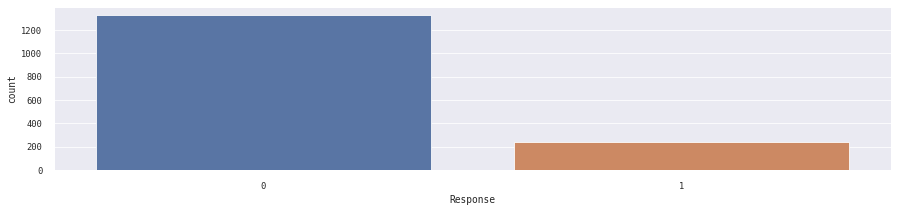

In [ ]:
#checking target distribution
sns.countplot(data = df_train, x = 'Response')

In [ ]:
df_train['Response'].value_counts()

0    1329
1     239
Name: Response, dtype: int64

In [ ]:
quantity_report(df_train)

,Total,Percent,Nunique,Dtype
Year_of_Birth,0,0.0000,56,int64
Cmp2Accepted,0,0.0000,2,int64
Cmp1Accepted,0,0.0000,2,int64
Cmp5Accepted,0,0.0000,2,int64
Cmp4Accepted,0,0.0000,2,int64
Cmp3Accepted,0,0.0000,2,int64
WebVisitsMonth,0,0.0000,16,int64
Amount_on_GoldProds,0,0.0000,199,int64
Amount_on_SweetProducts,0,0.0000,163,int64
Amount_on_FishProducts,0,0.0000,170,int64


In [ ]:
quantity_report(df_test)

,Total,Percent,Nunique,Dtype
Year_of_Birth,0,0.0000,54,int64
Cmp1Accepted,0,0.0000,2,int64
Cmp5Accepted,0,0.0000,2,int64
Cmp4Accepted,0,0.0000,2,int64
Cmp3Accepted,0,0.0000,2,int64
WebVisitsMonth,0,0.0000,12,int64
Amount_on_GoldProds,0,0.0000,156,int64
Amount_on_SweetProducts,0,0.0000,130,int64
Amount_on_FishProducts,0,0.0000,131,int64
Amount_on_MeatProducts,0,0.0000,294,int64


# CONVERTING DATETIME

In [ ]:
df_traintest = pd.concat([df_train, df_test]).reset_index(drop=True)

In [ ]:
df_traintest['Date_Customer'] = pd.to_datetime(df_traintest['Date_Customer'])

df_traintest['enrollment_year'] = df_traintest['Date_Customer'].dt.year
df_traintest['enrollment_month'] = df_traintest['Date_Customer'].dt.month
df_traintest['enrollment_day'] = df_traintest['Date_Customer'].dt.day

In [ ]:
df_traintest.head()

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,enrollment_year,enrollment_month,enrollment_day
0,1955,Graduation,Divorced,"77,504.4000",1,1,2014-06-22,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0.0000,2014,6,22
1,1958,Graduation,Together,"56,784.0000",0,1,2013-01-08,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0.0000,2013,1,8
2,1962,Graduation,Single,"103,714.8000",0,0,2013-11-21,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1.0000,2013,11,21
3,1979,2n Cycle,Single,"46,311.6000",1,0,2013-09-13,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0.0000,2013,9,13
4,1959,Graduation,Married,"87,486.0000",0,0,2014-01-21,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0.0000,2014,1,21


# ENCODING CATEGORICAL FEATURES

In [ ]:
df_traintest.head()

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,1955,Graduation,Divorced,"77,504.4000",1,1,22-06-2014,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0.0000
1,1958,Graduation,Together,"56,784.0000",0,1,01-08-2013,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0.0000
2,1962,Graduation,Single,"103,714.8000",0,0,21-11-2013,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1.0000
3,1979,2n Cycle,Single,"46,311.6000",1,0,13-09-2013,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0.0000
4,1959,Graduation,Married,"87,486.0000",0,0,21-01-2014,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0.0000


In [ ]:
df_cat = df_traintest.select_dtypes(include=object).columns
df_cat

Index(['Education_Level', 'Marital_Status', 'Date_Customer'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lenc = LabelEncoder()
for i in df_cat:
  df_traintest[i] = lenc.fit_transform(df_traintest[i])
df_traintest.head()

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,enrollment_year,enrollment_month,enrollment_day
0,1955,2,2,"77,504.4000",1,1,620,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0.0000,2014,6,22
1,1958,2,5,"56,784.0000",0,1,156,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0.0000,2013,1,8
2,1962,2,4,"103,714.8000",0,0,454,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1.0000,2013,11,21
3,1979,0,4,"46,311.6000",1,0,390,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0.0000,2013,9,13
4,1959,2,3,"87,486.0000",0,0,505,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0.0000,2014,1,21


In [ ]:
df_traintest.head(5)

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,enrollment_year,enrollment_month,enrollment_day
0,1955,2,2,"77,504.4000",1,1,620,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0.0000,2014,6,22
1,1958,2,5,"56,784.0000",0,1,156,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0.0000,2013,1,8
2,1962,2,4,"103,714.8000",0,0,454,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1.0000,2013,11,21
3,1979,0,4,"46,311.6000",1,0,390,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0.0000,2013,9,13
4,1959,2,3,"87,486.0000",0,0,505,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0.0000,2014,1,21


In [ ]:
new_data = df_traintest.drop(columns = ['Any_Complain'])

In [ ]:
new_data.head()

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Response,enrollment_year,enrollment_month,enrollment_day
0,1955,2,2,"77,504.4000",1,1,620,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0.0000,2014,6,22
1,1958,2,5,"56,784.0000",0,1,156,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0.0000,2013,1,8
2,1962,2,4,"103,714.8000",0,0,454,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,1.0000,2013,11,21
3,1979,0,4,"46,311.6000",1,0,390,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0.0000,2013,9,13
4,1959,2,3,"87,486.0000",0,0,505,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0.0000,2014,1,21


# DEALING WITH MISSING VALUES

In [ ]:
missing_vals = new_data.columns[new_data.isna().any()]
missing_vals.drop(['Response'])

Index(['Disposable_Income'], dtype='object')

In [ ]:
#handling missing values
for cols in missing_vals:

    new_data[cols].fillna(df_train['Disposable_Income'].median(), inplace = True)

In [ ]:
new_data.head(5)

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Response,enrollment_year,enrollment_month,enrollment_day
0,1955,2,2,"77,504.4000",1,1,620,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0.0000,2014,6,22
1,1958,2,5,"56,784.0000",0,1,156,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0.0000,2013,1,8
2,1962,2,4,"103,714.8000",0,0,454,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,1.0000,2013,11,21
3,1979,0,4,"46,311.6000",1,0,390,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0.0000,2013,9,13
4,1959,2,3,"87,486.0000",0,0,505,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0.0000,2014,1,21


In [ ]:
new_data.isna().sum()

Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Response                   0
enrollment_year            0
enrollment_month           0
enrollment_day             0
dtype: int64

# DATA VISUALISATIONS

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_of_Birth            2240 non-null   int64  
 1   Education_Level          2240 non-null   int32  
 2   Marital_Status           2240 non-null   int32  
 3   Disposable_Income        2240 non-null   float64
 4   No_of_Kids_in_home       2240 non-null   int64  
 5   No_of_Teen_in_home       2240 non-null   int64  
 6   Date_Customer            2240 non-null   int64  
 7   Recency                  2240 non-null   int64  
 8   Discounted_Purchases     2240 non-null   int64  
 9   WebPurchases             2240 non-null   int64  
 10  CatalogPurchases         2240 non-null   int64  
 11  StorePurchases           2240 non-null   int64  
 12  Amount_on_Wines          2240 non-null   int64  
 13  Amount_on_Fruits         2240 non-null   int64  
 14  Amount_on_MeatProducts  

In [ ]:
new_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year_of_Birth,"2,240.0000","1,969.8058",11.9841,"1,894.0000","1,960.0000","1,971.0000","1,978.0000","1,997.0000"
Education_Level,"2,240.0000",2.3937,1.1248,0.0000,2.0000,2.0000,3.0000,4.0000
Marital_Status,"2,240.0000",3.7299,1.0763,0.0000,3.0000,4.0000,5.0000,7.0000
Disposable_Income,"2,240.0000","62,678.1391","30,045.8863","2,076.0000","42,646.5000","61,290.0000","81,947.7000","799,999.2000"
No_of_Kids_in_home,"2,240.0000",0.4442,0.5384,0.0000,0.0000,0.0000,1.0000,2.0000
No_of_Teen_in_home,"2,240.0000",0.5062,0.5445,0.0000,0.0000,0.0000,1.0000,2.0000
Date_Customer,"2,240.0000",328.6451,190.7618,0.0000,166.7500,327.0000,492.2500,662.0000
Recency,"2,240.0000",56.1094,28.9625,7.0000,31.0000,56.0000,81.0000,106.0000
Discounted_Purchases,"2,240.0000",2.3250,1.9322,0.0000,1.0000,2.0000,3.0000,15.0000
WebPurchases,"2,240.0000",4.0848,2.7787,0.0000,2.0000,4.0000,6.0000,27.0000


# SEPERATING TRAIN AND TEST SETS

In [ ]:
len_df = len(df_train)
new_train = new_data[:len_df]
new_test = new_data[len_df:]

In [ ]:
new_train.head(5)

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Response,enrollment_year,enrollment_month,enrollment_day
0,1955,2,2,"77,504.4000",1,1,620,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0.0000,2014,6,22
1,1958,2,5,"56,784.0000",0,1,156,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0.0000,2013,1,8
2,1962,2,4,"103,714.8000",0,0,454,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,1.0000,2013,11,21
3,1979,0,4,"46,311.6000",1,0,390,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0.0000,2013,9,13
4,1959,2,3,"87,486.0000",0,0,505,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0.0000,2014,1,21


In [ ]:
new_test.head(5)

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Response,enrollment_year,enrollment_month,enrollment_day
1568,1954,2,4,"48,556.8000",0,1,436,85,6,8,2,8,429,20,118,7,23,41,8,0,0,0,0,0,"60,964.2000",2013,11,1
1569,1961,2,6,"57,499.2000",0,1,117,79,5,7,4,6,510,3,26,0,0,75,6,0,1,0,0,0,"60,964.2000",2012,11,22
1570,1973,1,3,"17,025.6000",0,0,203,47,1,2,0,4,7,10,11,16,12,27,6,0,0,0,0,0,"60,964.2000",2013,2,28
1571,1970,2,5,"91,983.6000",0,0,362,98,1,4,7,11,741,66,946,219,189,126,2,0,0,1,1,0,"60,964.2000",2013,8,16
1572,1959,2,5,"78,235.2000",0,2,341,41,2,7,6,11,748,22,181,12,0,200,5,1,0,0,0,0,"60,964.2000",2013,7,25


In [ ]:
new_train.shape, new_test.shape

((1568, 28), (672, 28))

# CREATING AND TRAINING MODELS

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
X = new_train.drop(columns=['Date_Customer','Response'])
y = new_train['Response']
n_test = new_test.drop(columns=['Date_Customer','Response'])

In [ ]:
X.head()

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,enrollment_year,enrollment_month,enrollment_day
0,1955,2,2,"77,504.4000",1,1,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,2014,6,22
1,1958,2,5,"56,784.0000",0,1,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,2013,1,8
2,1962,2,4,"103,714.8000",0,0,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,2013,11,21
3,1979,0,4,"46,311.6000",1,0,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,2013,9,13
4,1959,2,3,"87,486.0000",0,0,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,2014,1,21


In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
y.value_counts()

0.0000    1329
1.0000     239
Name: Response, dtype: int64

# BUILDING A LIGHTGBM MODEL

In [ ]:
#setting parameter for cross validation
n_sp = 5
Sp = StratifiedKFold(n_sp, shuffle=True, random_state=1234)

kwargs = {'n_estimators':1000,
          'subsample':0.85,
          'learning_rate':0.2,
          'scale_pos_weight':8,
         'max_depth':-1,
         'colsample_bytree':0.7,
         'subsample':0.85,
         'reg_alpha':3,
         'reg_lambda':20
         }


In [ ]:
sm = SMOTE(sampling_strategy={1:280, 0:1329}, random_state=50)
X1, y2 = sm.fit_resample(X, y)

In [ ]:
train_preds = np.zeros(len(X1))
test_preds = np.zeros(len(n_test))

for i, (train_ind, Vl_ind) in enumerate(Sp.split(X1, y2)):
    X_tr, y_tr = X1.iloc[train_ind], y2.iloc[train_ind]
    X_vl, y_vl = X1.iloc[Vl_ind], y2.iloc[Vl_ind]

    #training the model
    lb = LGBMClassifier(**kwargs)
    lb.fit(X_tr, y_tr, eval_set = [(X_vl, y_vl)],
                    verbose = 0, early_stopping_rounds=300)


    #evaluating the trained model
    pr_vl = lb.predict_proba(X_vl)[:,1]
    df_vl = pd.DataFrame(pr_vl)
    df_vl[0] = np.where(df_vl[0]>0.5, 1, 0)
    vl_score = f1_score((y_vl), (df_vl[0]))

    print(f'\nFold {i+1} Val score: {vl_score}\n')


    #prediting on the test set for submission
    test_pr = lb.predict_proba(n_test)[:,1]
    train_preds[Vl_ind] = pr_vl
    test_preds += test_pr/5

    df = pd.DataFrame(train_preds)
    df[0] = np.where(df[0]>0.5, 1, 0)

print("CV score: {:<8.5f}".format(f1_score(y2, df[0])))



Fold 1 Val score: 0.5585585585585585


Fold 2 Val score: 0.6222222222222222


Fold 3 Val score: 0.6837606837606838


Fold 4 Val score: 0.6440677966101694


Fold 5 Val score: 0.6984126984126985

CV score: 0.64250 


In [ ]:
sub['Response'] = test_preds
sub.to_csv('lgb_sub1.csv', index=False)

# BUILDING A XGBOOST MODEL

In [ ]:
#setting parameters for cross_validation
n_sp = 10
Sp = StratifiedKFold(n_sp, shuffle=True, random_state=1234)

#tuning the parametrs for xgboost
kwargs = {
    'learning_rate':0.05,
    'scale_pos_weight':2.5,
    'n_estimators':500,
    'tree_method': 'auto',
    'random_state':1234,
    'max_depth':5,
    'subsample': 0.85,
    'colsample_bytree': 0.7,
    'min_child_weight':14,
    }


In [ ]:
train_preds = np.zeros(len(X1))
test_preds = np.zeros(len(n_test))

for i, (train_ind, Vl_ind) in enumerate(Sp.split(X1, y2)):
    X_tr, y_tr = X1.iloc[train_ind], y2.iloc[train_ind]
    X_vl, y_vl = X1.iloc[Vl_ind], y2.iloc[Vl_ind]

        #training the model
    clf = XGBClassifier(objective='binary:logistic', use_label_encoder=False, **kwargs)
    clf.fit(X_tr, y_tr, eval_set=[(X_vl, y_vl)], verbose = 0, early_stopping_rounds=200)


    #evaluating the trained model
    pr_vl = clf.predict_proba(X_vl)[:,1]
    df_vl = pd.DataFrame(pr_vl)
    df_vl[0] = np.where(df_vl[0]>0.5, 1, 0)
    vl_score = f1_score((y_vl), (df_vl[0]))

    print(f'\nFold {i+1} Val score: {vl_score}\n')


    #prediting on the test set for submission
    test_pr = clf.predict_proba(n_test)[:,1]
    train_preds[Vl_ind] = pr_vl
    test_preds += test_pr/5

    df = pd.DataFrame(train_preds)
    df[0] = np.where(df[0]>0.5, 1, 0)

print("CV score: {:<8.5f}".format(f1_score(y2, df[0])))


Fold 1 Val score: 0.6792452830188679


Fold 2 Val score: 0.6363636363636364


Fold 3 Val score: 0.6428571428571429


Fold 4 Val score: 0.7419354838709677


Fold 5 Val score: 0.736842105263158


Fold 6 Val score: 0.6530612244897959


Fold 7 Val score: 0.7200000000000001


Fold 8 Val score: 0.6666666666666666


Fold 9 Val score: 0.7741935483870968


Fold 10 Val score: 0.6792452830188679

CV score: 0.69630 


In [ ]:
sub['Response'] = test_preds
sub.to_csv('xgbsub1.csv', index=False)